<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/cda-2022/blob/main/notebooks/cda_8_glm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python settings

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## GLM in R

In [2]:
%load_ext rpy2.ipython

In [5]:
%%R
df <- read.csv("https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/cda-2022/main/data/count-data.csv")
df$occup1 <- as.factor(df$occup1)
df$prof = df$occup1 == 2
head(df, 2)

      id year occup1 woj nace technical math artistic computer cognitive
1 626307 2014      5   4    M         0    0        1        0         0
2 626305 2014      5  12    M         0    0        0        0         0
  managerial interpersonal individual physical availability office total_skills
1          0             0          1        0            0      0            2
2          0             0          0        0            0      0            0
   prof
1 FALSE
2 FALSE


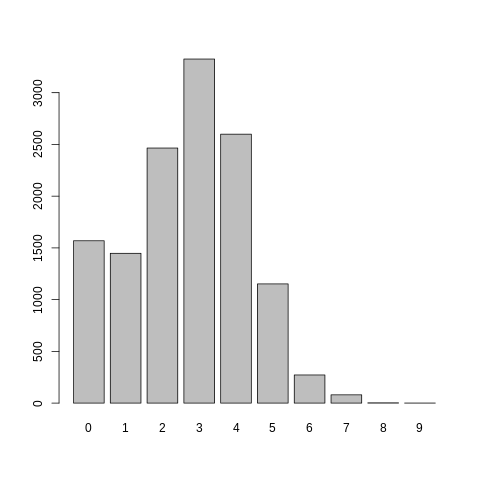

In [8]:
%%R
barplot(table(df$total_skills))

In [10]:
%%R
c(mean = mean(df$total_skills), var = var(df$total_skills))

    mean      var 
2.689639 2.492068 


In [11]:
%%R
m1 <- glm(formula = total_skills ~ prof, data = df, family = poisson)
summary(m1)


Call:
glm(formula = total_skills ~ prof, family = poisson, data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3785  -0.5203   0.2232   0.6552   2.9139  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.96690    0.00649  148.97  < 2e-16 ***
profTRUE     0.07290    0.01154    6.32 2.62e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 15551  on 12913  degrees of freedom
Residual deviance: 15512  on 12912  degrees of freedom
AIC: 48615

Number of Fisher Scoring iterations: 5



## GLM in Julia

In [ ]:
%%bash
wget -q https://julialang-s3.julialang.org/bin/linux/x64/1.7/julia-1.7.2-linux-x86_64.tar.gz
tar zxvf julia-1.7.2-linux-x86_64.tar.gz
## python's module
pip install julia

In [ ]:
import julia
julia.install(julia = "/content/julia-1.7.2/bin/julia")
from julia import Julia
jl = Julia(runtime="/content/julia-1.7.2/bin/julia",compiled_modules=False)
%load_ext julia.magic

In [ ]:
%%julia
using Pkg
Pkg.add("StatsBase")
Pkg.add("GLM")
Pkg.add("DataFrames")
Pkg.add("CategoricalArrays")
Pkg.add("CSV")

In [18]:
%%julia
using StatsBase
using GLM
using CategoricalArrays
using Statistics
using CSV
using DataFrames

In [25]:
%%julia
df = CSV.read(download("https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/cda-2022/main/data/count-data.csv"), DataFrame)
first(df,2)

<PyCall.jlwrap 2×17 DataFrame
 Row │ id      year   occup1  woj    nace     technical  math   artistic  computer  cognitive  managerial  interpersonal  individual  physical  availability  office  total_skills
     │ Int64   Int64  Int64   Int64  String1  Int64      Int64  Int64     Int64     Int64      Int64       Int64          Int64       Int64     Int64         Int64   Int64
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 626307   2014       5      4  M                0      0         1         0          0           0              0           1         0             0       0             2
   2 │ 626305   2014       5     12  M                0      0         0         0          0           0              0           0         0             0       0             0>

In [28]:
%%julia
df.occup1 = categorical(df.occup1)
df.prof = df.occup1 .== 2

array([False, False, False, ..., False,  True,  True])

In [31]:
%%julia
model1 = glm(@formula(total_skills ~ prof), df, Poisson())

<PyCall.jlwrap StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Poisson{Float64}, LogLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

total_skills ~ 1 + prof

Coefficients:
──────────────────────────────────────────────────────────────────────────
                 Coef.  Std. Error       z  Pr(>|z|)  Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────
(Intercept)  0.966899   0.00648961  148.99    <1e-99  0.95418    0.979619
prof         0.0729038  0.0115351     6.32    <1e-09  0.0502954  0.0955122
──────────────────────────────────────────────────────────────────────────>

## GLM in Python

In [ ]:
df= pd.read_csv("https://raw.githubusercontent.com/DepartmentOfStatisticsPUE/cda-2022/main/data/count-data.csv")
df["occup1"].astype("category")
df["prof"] = df["occup1"] == 2
df.head()

,id,year,occup1,woj,nace,technical,math,artistic,computer,cognitive,managerial,interpersonal,individual,physical,availability,office,total_skills,prof
0,626307,2014,5,4,M,0,0,1,0,0,0,0,1,0,0,0,2,False
1,626305,2014,5,12,M,0,0,0,0,0,0,0,0,0,0,0,0,False
2,617154,2014,7,14,C,0,0,0,0,0,0,0,0,0,0,0,0,False
3,617155,2014,7,14,C,0,0,0,0,0,0,0,0,0,0,0,0,False
4,632044,2014,3,24,C,0,0,0,0,0,0,1,0,1,0,0,2,False


In [ ]:
mod1 = smf.glm(formula="total_skills ~ prof", data=df, family=sm.families.Poisson()).fit()
print(mod1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           total_skills   No. Observations:                12914
Model:                            GLM   Df Residuals:                    12912
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24305.
Date:                Wed, 13 Apr 2022   Deviance:                       15512.
Time:                        07:58:33   Pearson chi2:                 1.20e+04
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9669      0.006    148.975   

In [ ]:
np.exp(mod1.params)

Intercept       2.629777
prof[T.True]    1.075627
dtype: float64

Get details about given family

In [ ]:
list(filter(lambda k: '_' not in k, dir(sm.families.Poisson())))

['deviance',
 'fitted',
 'link',
 'links',
 'loglike',
 'predict',
 'valid',
 'variance',
 'weights']

In [ ]:
sm.families.Poisson().links

[statsmodels.genmod.families.links.log,
 statsmodels.genmod.families.links.identity,
 statsmodels.genmod.families.links.sqrt]